In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
# 평가 함수 정의

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
df_raw = pd.read_csv('data/body.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [36]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop(columns = 'FAT', inplace = False)

df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 크기: (176, 14)
평가용 데이터의 크기: (76, 14)
학습용 데이터의 X 크기: (176, 13)
학습용 데이터의 Y 크기: (176,)
평가용 데이터의 X 크기: (76, 13)
평가용 데이터의 X 크기: (76,)


In [37]:
# 모델 생성

# 회귀 모델

lr_model = smf.ols(formula="FAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST", data = df_train)
lr_result = lr_model.fit()

In [38]:
# Decision tree

dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [39]:
# Random Forest
 
rf_model = RandomForestRegressor(min_samples_leaf= 6, random_state=1234, n_estimators = 100, min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [40]:
# Gradient Boosting

gb_model = GradientBoostingRegressor(min_samples_leaf= 11, random_state=1234, n_estimators = 30, min_samples_split=22, max_depth= 4, learning_rate= 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [41]:
# 예측 및 평가

In [42]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트', '그래디언트부스팅']

# 평가 리스트 초기회
mse, rmse, mae, mape = [], [], [], []

In [43]:
# 회귀분석

# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [44]:
# Decision Tree

# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [45]:
# Random Forest

# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [52]:
rf_model.score(df_test_x, df_test_y)

0.6272281414182838

In [46]:
# Gradient boosting

# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [47]:
print(mse)
print(rmse)
print(mae)
print(mape)

[21.904283794105197, 28.634493304123627, 24.822829014027725, 24.715876257051278]
[4.6802012557266375, 5.351120752153107, 4.982251400123014, 4.9715064373941305]
[3.754476975286473, 4.3936829257071555, 4.116729612141941, 4.087580962926603]
[24.31236155376498, 29.611214852193317, 25.72889647978033, 25.43899301726852]


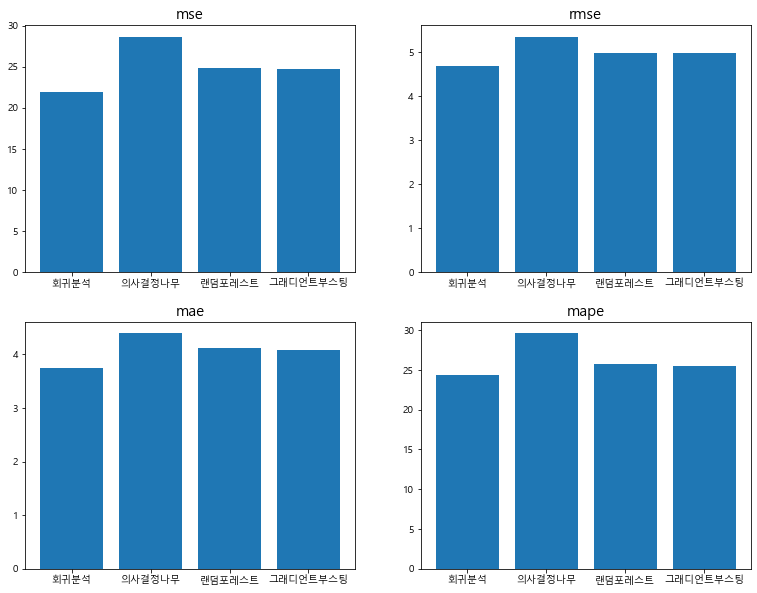

In [48]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title('mse').set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title('rmse').set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title('mae').set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title('mape').set_fontsize(15)

# 실습해보긔

In [31]:
df_tire = pd.read_csv('data/tire_heat.csv')
df_tire.head()

,Y,Weight,Velocity,Shoulder,Temperature,Time
0,98,70,70,36.5,36,5
1,80,70,70,36.0,36,6
2,113,70,90,37.0,37,6
3,100,70,90,36.3,37,6
4,103,70,110,36.5,39,4


In [32]:
df_tire_y = df_tire['Y']
df_tire_x = df_tire.drop(columns = 'Y', inplace = False)

df_train, df_test = train_test_split(df_tire, test_size=0.3, random_state=1234)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tire_x, df_tire_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 크기: (277, 6)
평가용 데이터의 크기: (119, 6)
학습용 데이터의 X 크기: (277, 5)
학습용 데이터의 Y 크기: (277,)
평가용 데이터의 X 크기: (119, 5)
평가용 데이터의 X 크기: (119,)


In [33]:
# 모델 생성

# 회귀 모델

lr_model = smf.ols(formula="Y ~ Weight + Velocity + Shoulder + Temperature + Time", data = df_train)
lr_result = lr_model.fit()

In [34]:
# Decision tree
# 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 14
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 6, min_samples_split=14, max_depth = 6 )
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [35]:
# Random Forest
# n_estimators': 90, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 10
rf_model = RandomForestRegressor(min_samples_leaf= 3, random_state=1234, n_estimators = 90, min_samples_split = 4, max_depth = 10)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=90, random_state=1234)

In [11]:
# Gradient Boosting

gb_model = GradientBoostingRegressor(min_samples_leaf= 11, random_state=1234, n_estimators = 30, min_samples_split=22, max_depth= 4, learning_rate= 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [12]:
# 예측 및 평가

In [24]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트', '그래디언트부스팅']

# 평가 리스트 초기회
mse, rmse, mae, mape = [], [], [], []

In [25]:
# 회귀분석

# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [26]:
# Decision Tree

# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [27]:
# Random Forest

# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [28]:
# Gradient boosting

# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [29]:
print(mse)
print(rmse)
print(mae)
print(mape)

[21.904283794105197, 28.634493304123627, 24.822829014027725, 24.715876257051278]
[4.6802012557266375, 5.351120752153107, 4.982251400123014, 4.9715064373941305]
[3.754476975286473, 4.3936829257071555, 4.116729612141941, 4.087580962926603]
[24.31236155376498, 29.611214852193317, 25.72889647978033, 25.43899301726852]


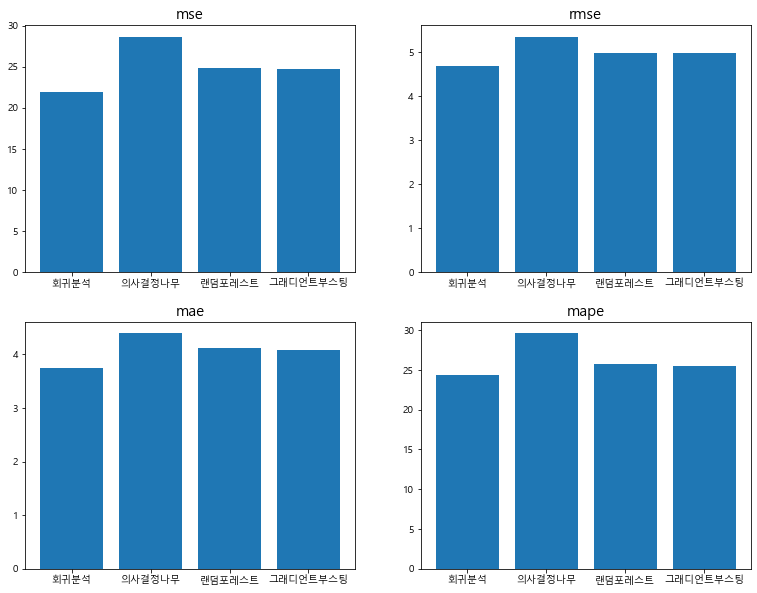

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title('mse').set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title('rmse').set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title('mae').set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title('mape').set_fontsize(15)